# Sales Forecasting and Optimization

* Purpose: This project aims to predict future sales for a retail or e-commerce business by using historical sales data.
* Output: Insights + visualizations to guide preprocessing & modeling team.

* Data set: Time-series retail dataset, contains daily records for multiple products across different store for Corporacion Favorita supermarket chain.

* This notebook aims to make exploratory data analysis (EDA) to :
1) Understand trends, seasonality, and missing values in the dataset. 
2) Generate summary statistics, check for outliers, and identify key patterns and correlations.

In [66]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# read csv file, parse the date column as datetime
dataset = pd.read_csv("train_sample.csv", parse_dates=['date'])
dataset.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,day,month,dayofweek,family,city,state,type
0,0,2013-01-01,21,3,7.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
1,1,2013-01-01,21,4,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
2,2,2013-01-01,21,5,2.0,0,1,1,1,CLEANING,Santo Domingo,Santo Domingo de los Tsachilas,B
3,3,2013-01-01,21,12,1.0,0,1,1,1,GROCERY I,Santo Domingo,Santo Domingo de los Tsachilas,B
4,4,2013-01-01,21,15,1.0,0,1,1,1,BREAD/BAKERY,Santo Domingo,Santo Domingo de los Tsachilas,B


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  int64         
 6   day          int64         
 7   month        int64         
 8   dayofweek    int64         
 9   family       object        
 10  city         object        
 11  state        object        
 12  type         object        
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 198.4+ MB


# 1) Data Quality & Structure

In [69]:
# check for missing values
missing_values_count = dataset.isnull().sum()
print(missing_values_count)

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
day            0
month          0
dayofweek      0
family         0
city           0
state          0
type           0
dtype: int64


* There is no missing values in the dataset

In [70]:
# check for duplicates
duplicates_count = dataset.duplicated().sum()
print(duplicates_count)

0


* There is no duplicates in the dataset

# 2) Univariate Analysis

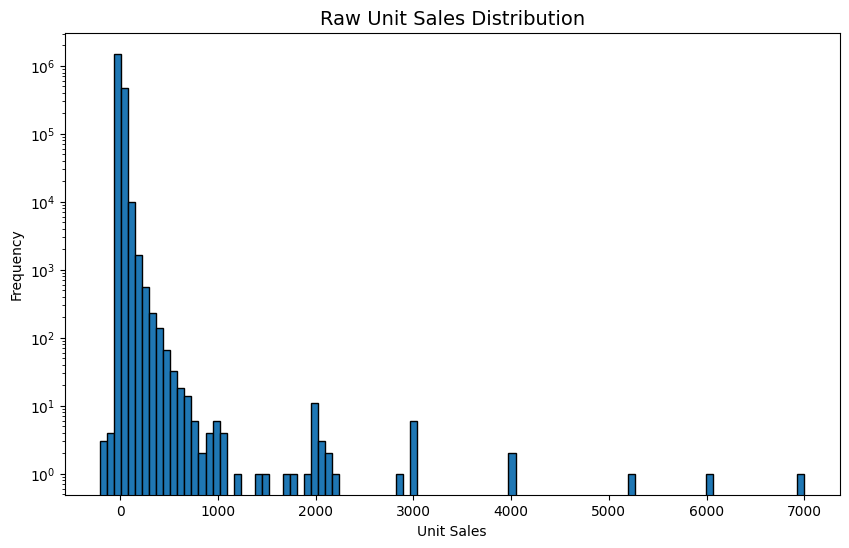

Raw Unit Sales Summary:
count    2.000000e+06
mean     8.551026e+00
std      1.965433e+01
min     -2.070000e+02
25%      2.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      7.001000e+03
Name: unit_sales, dtype: float64


In [71]:
# ===============================
# Sales Distribution - Raw Distribution
# ===============================

# Plot raw unit_sales distribution to inspect skewness and spread
plt.figure(figsize=(10,6))
plt.hist(dataset['unit_sales'], bins=100, edgecolor='black')
plt.title("Raw Unit Sales Distribution", fontsize=14)
plt.xlabel("Unit Sales")
plt.ylabel("Frequency")
plt.yscale("log")  # use log scale to better visualize skewness and long tail
plt.show()

# Summary statistics
print("Raw Unit Sales Summary:")
print(dataset['unit_sales'].describe())


c:\Users\fxrxh\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\fxrxh\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


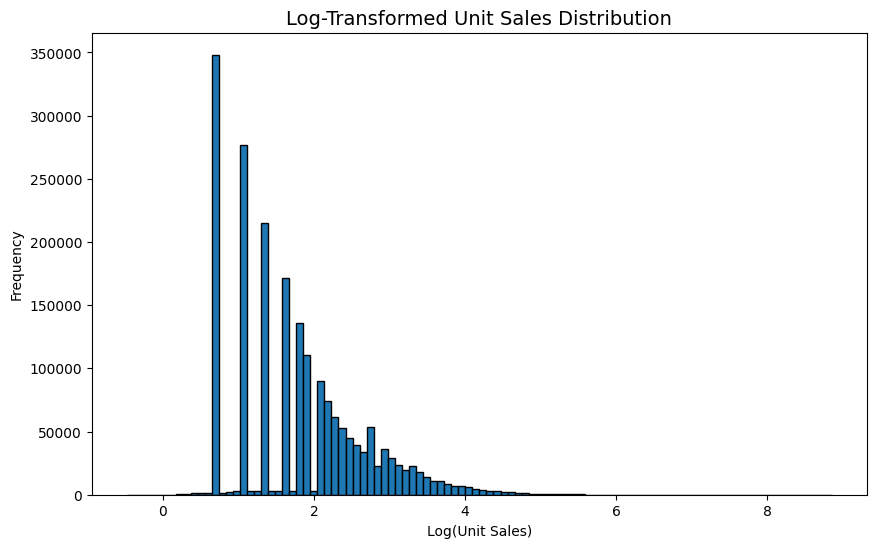

Log-Transformed Unit Sales Summary:
count    1.999873e+06
mean     1.783562e+00
std      8.704122e-01
min     -4.732088e-01
25%      1.098612e+00
50%      1.609438e+00
75%      2.302585e+00
max      8.853951e+00
Name: unit_sales_log, dtype: float64


In [72]:
# ===============================
# Sales Distribution - Log Transformation
# ===============================

# Feature engineering: log transform to reduce skewness
dataset['unit_sales_log'] = np.log1p(dataset['unit_sales'])  # log10() = log(1+x) to handle 0 values

# Check for finite values (log transform can fail with negatives)
finite_unit_sales_log = dataset['unit_sales_log'][np.isfinite(dataset['unit_sales_log'])]

# Plot log-transformed distribution
plt.figure(figsize=(10,6))
plt.hist(finite_unit_sales_log, bins=100, edgecolor='black')
plt.title("Log-Transformed Unit Sales Distribution", fontsize=14)
plt.xlabel("Log(Unit Sales)")
plt.ylabel("Frequency")
plt.show()

# Summary statistics
print("Log-Transformed Unit Sales Summary:")
print(finite_unit_sales_log.describe())


* Raw sales are highly skewed, with many small values and few very large ones.

* Log transformation stabilizes variance and reduces skewness, making the data more suitable for modeling.

Number of Outliers: 187876
Max Unit Sales: 7001.0


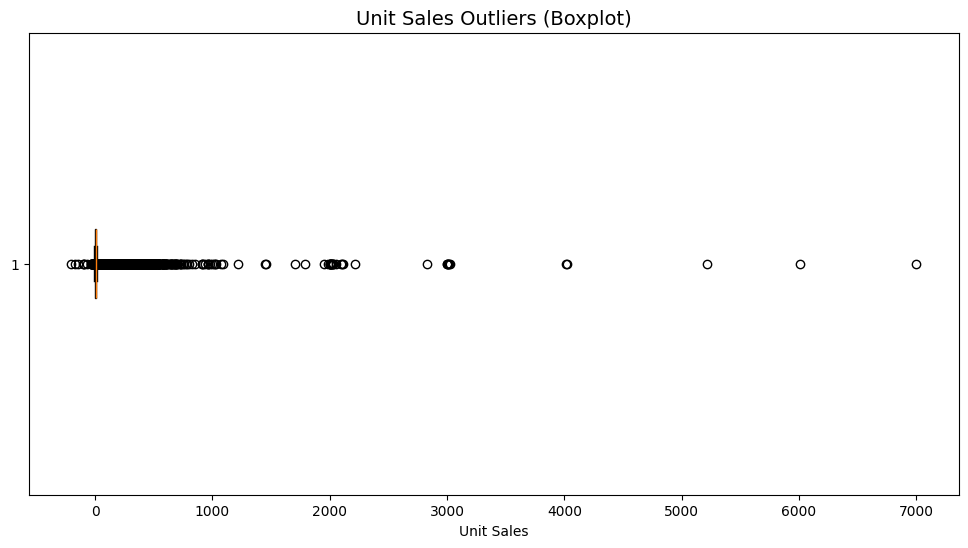

In [73]:
# ===============================
# Outlier Detection (Unit Sales)
# ===============================

# 1. Calculate IQR
Q1 = dataset['unit_sales'].quantile(0.25)
Q3 = dataset['unit_sales'].quantile(0.75)
IQR = Q3 - Q1

# 2. Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filter outliers
outliers = dataset[(dataset['unit_sales'] < lower_bound) | (dataset['unit_sales'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])
print("Max Unit Sales:", dataset['unit_sales'].max())

# 4. Visualize outliers using a boxplot
plt.figure(figsize=(12,6))
plt.boxplot(dataset['unit_sales'], vert=False, patch_artist=True)
plt.title("Unit Sales Outliers (Boxplot)", fontsize=14)
plt.xlabel("Unit Sales")
plt.show()


Business Note: Outliers or extreme unit_sales values Should not be automatically removed; likely real events, they may indicates promotional/holiday effects.

Number of Returns/Refunds: 130
Minimum Unit Sales Value: -207.0

Sample of Returns/Refunds:
          id       date  store_nbr  item_nbr  unit_sales  onpromotion  day  \
10655  10655 2013-01-02          9       507        -3.0            1    2   
46867  46867 2013-01-03          4       644        -1.0            1    3   
50970  50970 2013-01-03          8       397        -3.0            0    3   
71807  71807 2013-01-03         35       996       -19.0            0    3   
71992  71992 2013-01-03         35      1361       -27.0            1    3   

       month  dayofweek     family    city      state type  unit_sales_log  
10655      1          2  HOME CARE   Quito  Pichincha    B             NaN  
46867      1          3      DAIRY   Quito  Pichincha    D            -inf  
50970      1          3  GROCERY I   Quito  Pichincha    D             NaN  
71807      1          3       DELI  Playas     Guayas    C             NaN  
71992      1          3   CLEANING  Playas     Guayas 

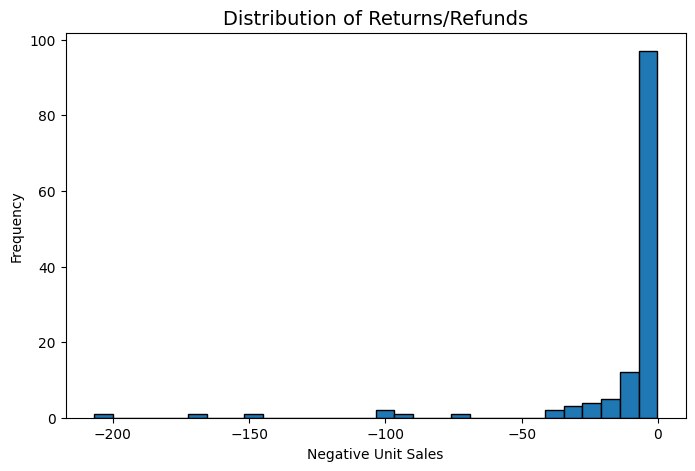

In [74]:
# ===============================
# Returns/Refunds Analysis (Negative Sales)
# ===============================

# Detect negative sales values (refunds/returns)
returns = dataset[dataset['unit_sales'] < 0]

print("Number of Returns/Refunds:", returns.shape[0])
print("Minimum Unit Sales Value:", dataset['unit_sales'].min())
print("\nSample of Returns/Refunds:")
print(returns.head())

# Plot histogram for returns if any exist
if not returns.empty:
    plt.figure(figsize=(8,5))
    plt.hist(returns['unit_sales'], bins=30, edgecolor='black')
    plt.title("Distribution of Returns/Refunds", fontsize=14)
    plt.xlabel("Negative Unit Sales")
    plt.ylabel("Frequency")
    plt.show()


Negative sales (returns/refunds) exist → should be treated separately during preprocessing, May be engineered into a separate feature as they have importance that may influence our predictions

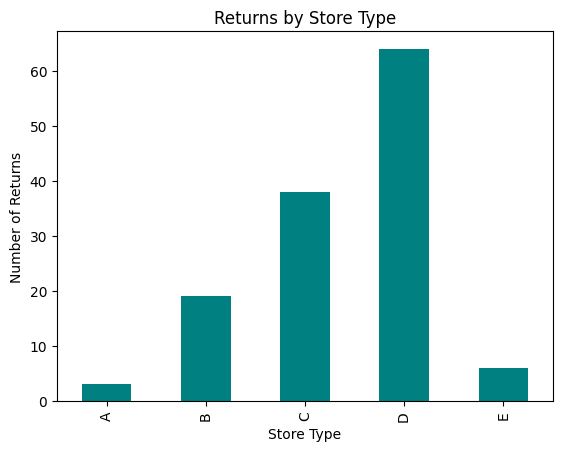

In [75]:
returns_by_type = returns.groupby('type')['unit_sales'].count()
returns_by_type.plot(kind='bar', color='teal')
plt.title("Returns by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Number of Returns")
plt.show()


Store-type analysis suggests that `Type [D]` stores handle significantly more returns, potentially linked to store size or policies

* Promotion vs Return/refund rate

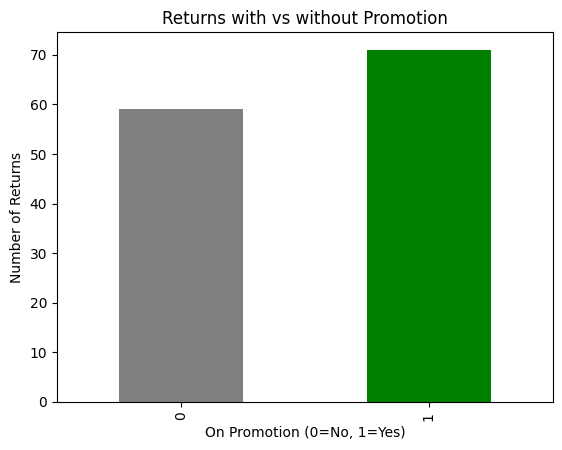

In [76]:
promo_returns = returns.groupby('onpromotion')['unit_sales'].count()
promo_returns.plot(kind='bar', color=['gray','green'])
plt.title("Returns with vs without Promotion")
plt.xlabel("On Promotion (0=No, 1=Yes)")
plt.ylabel("Number of Returns")
plt.show()

Promotional items have a higher return rate, highlighting possible quality concerns or impulse-buying effects. "سلوك شراء متهور."

# 3) Time Series Exploration

# 5) Store & Regional Analysis

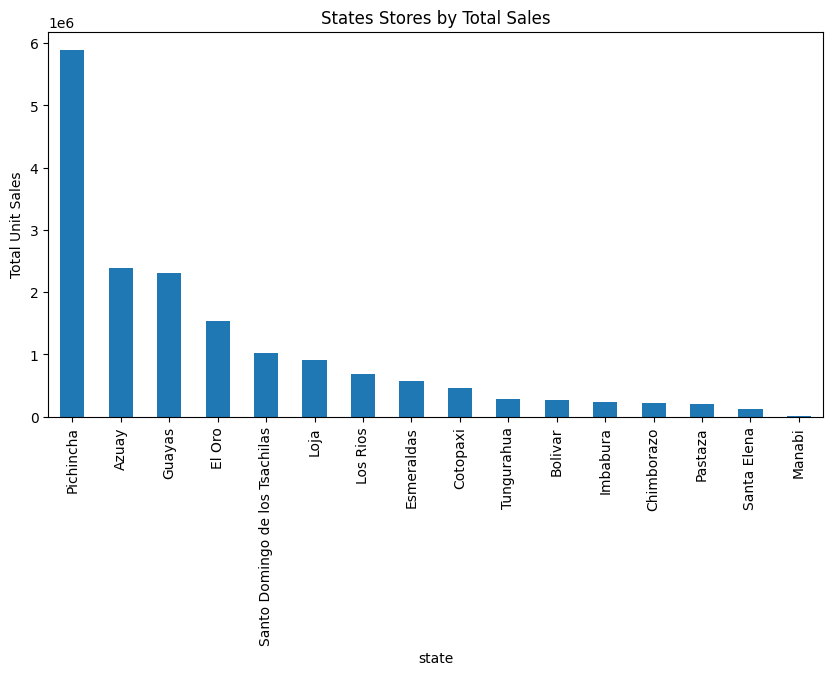

In [77]:
# ===============================
# Store Counts -> Which state stores dominate sales?
# ===============================

store_sales = dataset.groupby("state")["unit_sales"].sum().sort_values(ascending=False)
store_sales.plot(kind="bar", figsize=(10, 5))
plt.title("States Stores by Total Sales")
plt.ylabel("Total Unit Sales")
plt.show()

- **Regional Analysis:** Sales are highly concentrated in a few states, especially Pichincha. state is a strong predictor of sales and should be included as a feature.

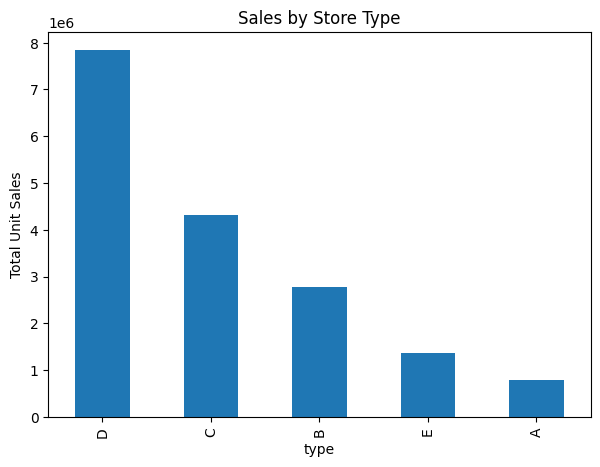

In [78]:
#  Store Counts -> Which store types dominate sales?
type_sales = dataset.groupby("type")["unit_sales"].sum().sort_values(ascending=False)
type_sales.plot(kind="bar", figsize=(7,5))
plt.title("Sales by Store Type")
plt.ylabel("Total Unit Sales")
plt.show()

- **Store Type Analysis:** Store type `[D]` has the highest total sales, but this may be due to more stores or larger stores. Normalize by store count for fair comparison. Further analysis (e.g., regression) is needed to isolate the effect of store type from other factors (location, promotions).


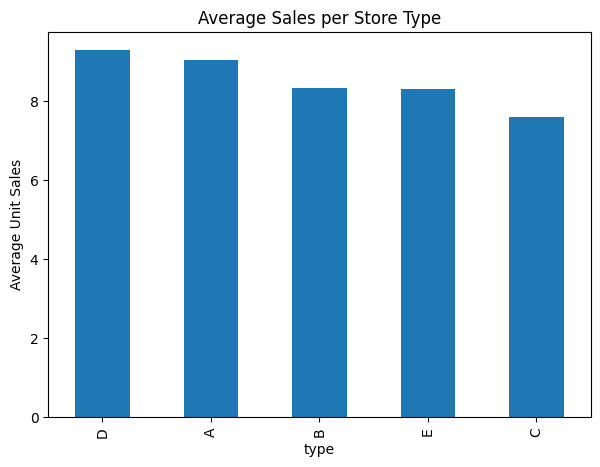

In [ ]:
# To see if type “A” dominates because it has more stores, or because each A store sells more on average:
type_avg_sales = dataset.groupby("type")["unit_sales"].mean().sort_values(ascending=False)
type_avg_sales.plot(kind="bar", figsize=(7,5))
plt.title("Average Sales per Store Type")
plt.ylabel("Average Unit Sales")
plt.show()


Avoid assuming that total sales dominance is only due to store count; average sales per store provides a more nuanced view of store type performance.


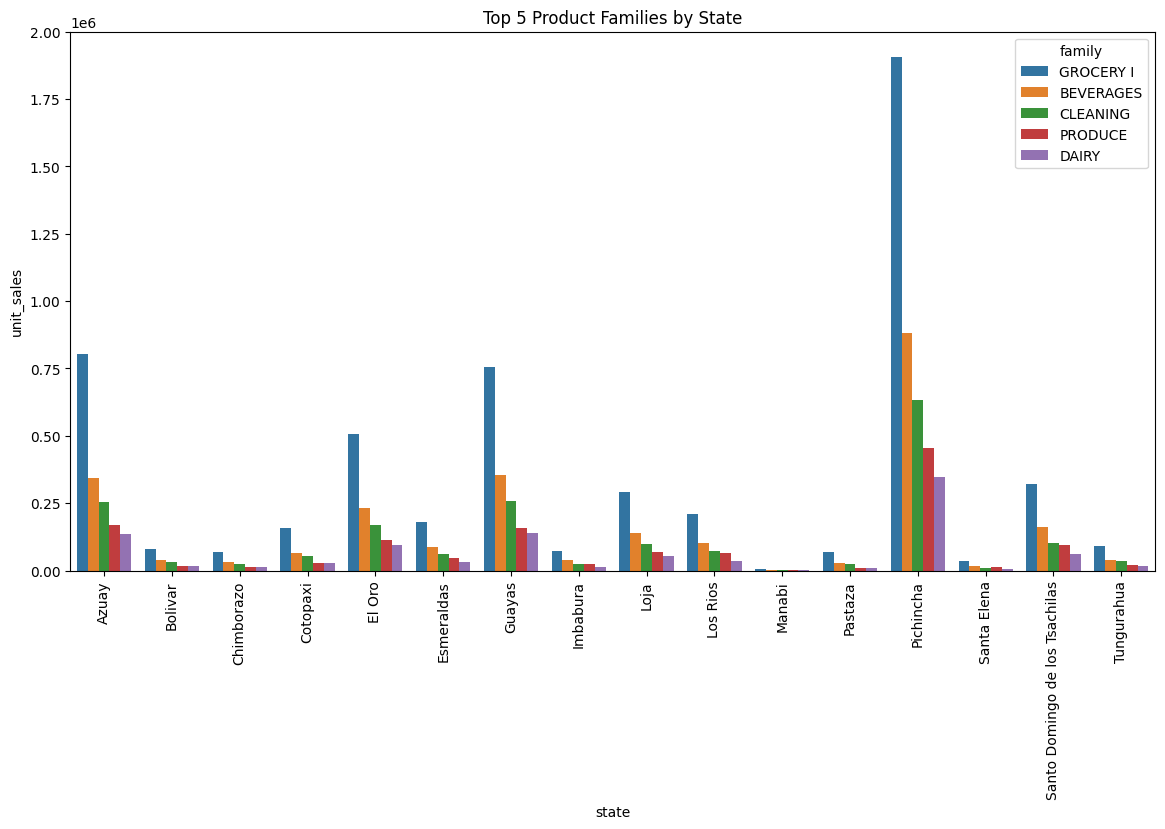

In [82]:
# Store–Item Interactions (Regional Bestsellers)

# Top 5 families per state
top_families_state = (
    dataset.groupby(["state", "family"])["unit_sales"].sum()
    .reset_index()
    .sort_values(["state","unit_sales"], ascending=[True, False])
)

# Select top 5 families for each state
top_families_state = top_families_state.groupby("state").head(5)

import seaborn as sns
plt.figure(figsize=(14,7))
sns.barplot(data=top_families_state, x="state", y="unit_sales", hue="family")
plt.title("Top 5 Product Families by State")
plt.xticks(rotation=90)
plt.show()


**regional preferences:** For each state, find the top 5 bestselling product families.

**Recommendations:**
- Use log-transformed sales for modeling.
- Engineer features for returns/refunds and promotions.
- Normalize sales by store count/type for fair comparisons.